# Import Modules
You may need to install some of them.

In [6]:
using Revise, DeconvOptim, TestImages, Colors, Noise, ImageShow

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

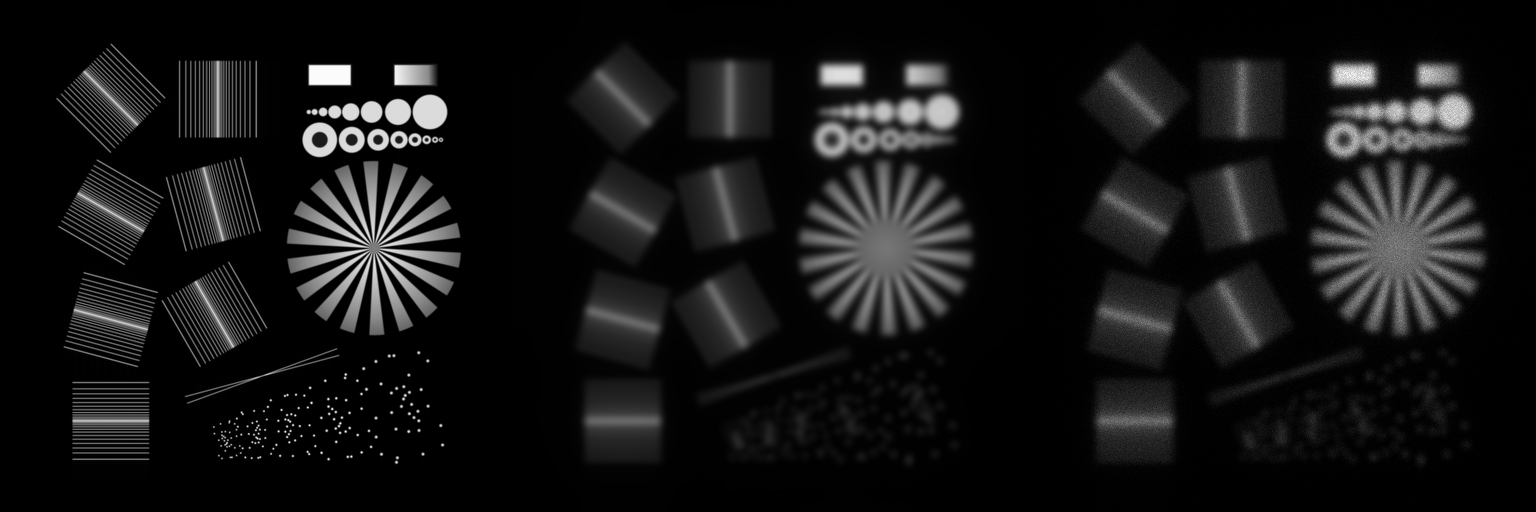

In [7]:
# load test images
img = Float32.(testimage("resolution_test_512"))

psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = conv_psf(img, psf, [1, 2])
img_n = poisson(img_b, 300);

h_view(img, img_b, img_n)

# Changing the loss function

  1.263682 seconds (25.64 M allocations: 1.252 GiB, 24.80% gc time, 27.19% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.439698e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.03e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.76e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.89e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.45e-05 ≰ 0.0e+00
    |g(x)|                 = 1.68e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    10
    f(x) calls:    31
    ∇f(x) calls:   31

  0.896583 seconds (23.27 M allocations: 1.198 GiB, 6.65% gc time, 36.59% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.047441e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.27e-02 ≰ 0.0e+00

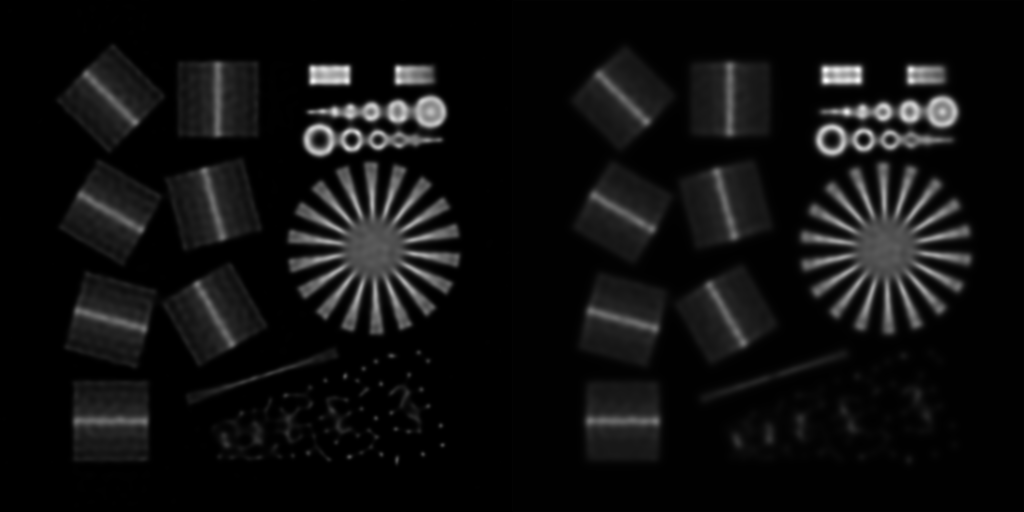

In [9]:
@time resP, optim_res = deconvolution(img_n, psf, loss=Poisson(), iterations=10)
@show optim_res

@time resG, optim_res = deconvolution(img_n, psf, loss=Gauss(), iterations=10)
@show optim_res

h_view(resP, resG)